#imporation des librairies

In [ ]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from numpy.core.numeric import NaN
import tensorflow as tf
from tensorflow import keras
import random
import sklearn
from keras.callbacks import ModelCheckpoint
import os
import seaborn as sn
import math


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

%pip install keras-tuner --upgrade
import keras_tuner as kt
from keras import regularizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importation données:


Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("X")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/RT/par_localisation

[Errno 2] No such file or directory: 'drive/MyDrive/RT/par_localisation'
/content/drive/MyDrive/RT/par_localisation


In [ ]:
#importation des données
df_data = pd.read_csv('X.csv',sep=";")
df_data

,Class,SAS10,MCSv,LT,LTMCS,AAV,LSV,proba_kn,proba_rfc,proba_dtc,proba_svc
0,1,0.4633,0.1076,40.4710,0.0859,0.1338,0.8025,0.0,0.000000,0.000000,0.011792
1,1,0.4540,0.0997,36.4405,0.0815,0.1233,0.7998,0.0,0.033333,0.492647,0.220748
2,1,0.4880,0.0803,61.0115,0.0558,0.1058,0.7631,0.0,0.000000,0.000000,0.000006
3,1,0.4113,0.1118,34.3492,0.0926,0.1467,0.7588,0.0,0.000000,0.000000,0.048240
4,1,0.6148,0.0940,31.4994,0.0792,0.1329,0.7026,0.0,0.133333,0.540984,0.041557
...,...,...,...,...,...,...,...,...,...,...,...
1627,1,0.5041,0.1099,46.2522,0.0845,0.1460,0.7514,0.8,0.133333,0.653061,0.211097
1628,1,0.4571,0.1253,41.3130,0.0995,0.1825,0.6850,0.0,0.000000,0.000000,0.010638
1629,1,0.3610,0.1406,30.2030,0.1194,0.2063,0.6746,0.0,0.133333,0.160000,0.038206
1630,1,0.5300,0.0692,64.1103,0.0470,0.0923,0.7494,0.0,0.000000,0.000000,0.006409


Normalisation:

In [ ]:
#Supprimer les lignes avec des Nan:
index_with_nan = df_data.index[df_data.isnull().any(axis=1)]
df_data.drop(index_with_nan,0, inplace=True)

df_data

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Class,SAS10,MCSv,LT,LTMCS,AAV,LSV,proba_kn,proba_rfc,proba_dtc,proba_svc
0,1,0.4633,0.1076,40.4710,0.0859,0.1338,0.8025,0.0,0.000000,0.000000,0.011792
1,1,0.4540,0.0997,36.4405,0.0815,0.1233,0.7998,0.0,0.033333,0.492647,0.220748
2,1,0.4880,0.0803,61.0115,0.0558,0.1058,0.7631,0.0,0.000000,0.000000,0.000006
3,1,0.4113,0.1118,34.3492,0.0926,0.1467,0.7588,0.0,0.000000,0.000000,0.048240
4,1,0.6148,0.0940,31.4994,0.0792,0.1329,0.7026,0.0,0.133333,0.540984,0.041557
...,...,...,...,...,...,...,...,...,...,...,...
1627,1,0.5041,0.1099,46.2522,0.0845,0.1460,0.7514,0.8,0.133333,0.653061,0.211097
1628,1,0.4571,0.1253,41.3130,0.0995,0.1825,0.6850,0.0,0.000000,0.000000,0.010638
1629,1,0.3610,0.1406,30.2030,0.1194,0.2063,0.6746,0.0,0.133333,0.160000,0.038206
1630,1,0.5300,0.0692,64.1103,0.0470,0.0923,0.7494,0.0,0.000000,0.000000,0.006409


In [ ]:
#création de X et y
#X=df_X.drop('Surname_encod',1)#enléve la premiére colone avec les numéros de ligne
X=df_data.drop('Class',1)#enléve la premiére colone avec les numéros de ligne
y=df_data["Class"]
X

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,SAS10,MCSv,LT,LTMCS,AAV,LSV,proba_kn,proba_rfc,proba_dtc,proba_svc
0,0.4633,0.1076,40.4710,0.0859,0.1338,0.8025,0.0,0.000000,0.000000,0.011792
1,0.4540,0.0997,36.4405,0.0815,0.1233,0.7998,0.0,0.033333,0.492647,0.220748
2,0.4880,0.0803,61.0115,0.0558,0.1058,0.7631,0.0,0.000000,0.000000,0.000006
3,0.4113,0.1118,34.3492,0.0926,0.1467,0.7588,0.0,0.000000,0.000000,0.048240
4,0.6148,0.0940,31.4994,0.0792,0.1329,0.7026,0.0,0.133333,0.540984,0.041557
...,...,...,...,...,...,...,...,...,...,...
1627,0.5041,0.1099,46.2522,0.0845,0.1460,0.7514,0.8,0.133333,0.653061,0.211097
1628,0.4571,0.1253,41.3130,0.0995,0.1825,0.6850,0.0,0.000000,0.000000,0.010638
1629,0.3610,0.1406,30.2030,0.1194,0.2063,0.6746,0.0,0.133333,0.160000,0.038206
1630,0.5300,0.0692,64.1103,0.0470,0.0923,0.7494,0.0,0.000000,0.000000,0.006409


In [ ]:
#normalisation des données par colonne:
#df_data=(df_data-df_data.min())/(df_data.max()-df_data.min())

# define standard scaler
scaler = StandardScaler()
# transform data
ScalerAll = scaler.fit(X)
X = scaler.fit_transform(X)

#Préparation des données:

In [ ]:
#database équilibrer:?
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1632
    Positive: 1499 (91.85% of total)



Si déséquilibré

In [ ]:
#Synthetic Minority Oversampling Technique
#importation des données
#X=df_data.drop('Class',1)#enléve la premiére colone avec les numéros de ligne


print("Nombre d'échantillon classe :\n",y.value_counts())

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 7,stratify=y)

#Synthetic Minority Oversampling Technique: K neigboor pour creer les données supplémentaire

#si variable continu:
from imblearn.over_sampling import SMOTE,ADASYN, RandomOverSampler, BorderlineSMOTE ,SVMSMOTE, KMeansSMOTE

#Nom_methode=SMOTE(sampling_strategy='auto',k_neighbors=2) #'minority' AC=0.96
#Nom_methode=ADASYN(sampling_strategy='auto',n_neighbors=2) #'minority' AC=0.97
#Nom_methode=RandomOverSampler(random_state=0)
#Nom_methode=BorderlineSMOTE(sampling_strategy='auto',k_neighbors=2) #'minority'
#Nom_methode=SVMSMOTE(sampling_strategy='auto',k_neighbors=2) #'minority'
Nom_methode=KMeansSMOTE(sampling_strategy='auto',k_neighbors=2) #'minority' #Ac=97.13

#si mélange de variable continu et categoriel:
#from imblearn.over_sampling import SMOTENC
#Nom_methode = SMOTENC(categorical_features=[0, 2], random_state=0)

###attention si variable seulement catégoriel:
#from imblearn.over_sampling import SMOTEN
#Nom_methode = SMOTEN(random_state=7)

X_OS,y_OS=Nom_methode.fit_resample(X_train,y_train)
X_train=X_OS
y_train=y_OS

#ros = RandomOverSampler(random_state=0)
#X_OS,y_OS=ros.fit_resample(X_train,y_train)

print("Nombre d'échantillon classe OverSampling :\n",y_OS.value_counts())



Nombre d'échantillon classe :
 1    1499
0     133
Name: Class, dtype: int64
Nombre d'échantillon classe OverSampling :
 1    1199
0    1199
Name: Class, dtype: int64


Si équilibré:

In [ ]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 7,stratify=y)
y_train.value_counts()

1    1199
0     106
Name: Class, dtype: int64

si on veut utiliser les poids pour le model d'appprentissage

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(y_train),   y = y_train)    
weights = dict(enumerate(class_weights))
weights 

{0: 6.15566037735849, 1: 0.5442035029190992}

Transformation en données catégoriel:

In [ ]:
#pour l'utilisation de softmax:
y_train=keras.utils.to_categorical(y_train, num_classes=2, dtype=y_train.dtype)#'float32'
y_test=keras.utils.to_categorical(y_test, num_classes=2, dtype=y_train.dtype)#'float32'
y=keras.utils.to_categorical(y, num_classes=2, dtype=y_train.dtype)#'float32'

Visualisation des données

In [ ]:
X_train.shape[1]

4

#Optimisation des hyperparamétres du modéle:

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  #model.add(keras.Input(shape=(30,)))

 #limitation recherche des denses layers:
  min_dense=X.shape[1]
  max_dense=int(len(X))
  step_dense=int(len(X)/20)


 #first layers

  hp_activation=hp.Choice('Fonction_activation_1',["elu","gelu","relu","selu"])    #["elu","gelu","relu","selu"]) 
  hp_units = hp.Int('NdenseLayers_1', min_value=min_dense, max_value=max_dense, step=step_dense)
  hp_regularizer=hp.Choice('FonctionRegularisation_1',["l2","l1","l1_l2" ])#  tf.keras.regularizers.L1(0.1)])
  model.add(keras.layers.Dense(units=hp_units, activation=hp_activation, kernel_regularizer=hp_regularizer))
 
  hp_DO = hp.Int('DropOut1:[%]', min_value=0, max_value=80, step=10)
  model.add(keras.layers.Dropout(rate=hp_DO/100))

  #model.add(keras.layers.BatchNormalization()) 

  #second layers

  hp_activation2=hp.Choice('Fonction_activation_2',["elu","gelu","relu","selu"]) 
  hp_units2 = hp.Int('NdenseLayers_2', min_value=min_dense, max_value=max_dense, step=step_dense)
  hp_regularizer2=hp.Choice('FonctionRegularisation_2',["l2","l1","l1_l2" ])#  tf.keras.regularizers.L1(0.1)])
  model.add(keras.layers.Dense(units=hp_units2, activation= hp_activation2,kernel_regularizer=hp_regularizer2))

  hp_DO2 = hp.Int('DropOut2:[%]', min_value=10, max_value=80, step=10)
  model.add(keras.layers.Dropout(rate=hp_DO2/100))

  #model.add(keras.layers.BatchNormalization()) 
  
  #third layers

  hp_activation3=hp.Choice('Fonction_activation_3',["softmax"]) #"softplus","softsign"
  model.add(keras.layers.Dense(2, activation=hp_activation3))

  # Tune the learning rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values=[0.05,0.01,0.005])
 
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss='BinaryCrossentropy',
              metrics=['BinaryAccuracy'])#Recall


  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='loss', #'binary_accuracy','loss'
                     max_epochs=100,
                     factor=3,
                     directory='X/sample_data',
                     project_name='Optim1')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

tuner.search(X, y, validation_split=0.01, callbacks=[stop_early],class_weight=weights)#,batch_size=int(len(X)/10)) #,batch_size=,epochs=100,)



INFO:tensorflow:Reloading Oracle from existing project /content/sample_data/Optim1/oracle.json
INFO:tensorflow:Reloading Tuner from /content/sample_data/Optim1/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

tuner.results_summary(num_trials=1)


Results summary
Results in /content/sample_data/Optim1
Showing 1 best trials
Trial summary
Hyperparameters:
Fonction_activation_1: relu
NdenseLayers_1: 658
FonctionRegularisation_1: l2
DropOut1:[%]: 0
Fonction_activation_2: selu
NdenseLayers_2: 658
FonctionRegularisation_2: l2
DropOut2:[%]: 60
Fonction_activation_3: softmax
learning_rate: 0.005
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
Score: 0.20777106285095215


#Build the hyper parametre model:

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 1000 epochs
model = tuner.hypermodel.build(best_hps)

X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test)

#######create callback
filepath = '/content/my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=0,
                             patience=5, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

history=model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs=1000, batch_size=int(len(X_train)),class_weight=weights,callbacks=callbacks,verbose=0) 


#Load best model
model = keras.models.load_model(filepath)


In [ ]:
#résumé du model:
model.summary()
print(model.get_config())
print(model.optimizer.get_config())
print(model.loss)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 658)               7238      
                                                                 
 dropout_16 (Dropout)        (None, 658)               0         
                                                                 
 dense_25 (Dense)            (None, 658)               433622    
                                                                 
 dropout_17 (Dropout)        (None, 658)               0         
                                                                 
 dense_26 (Dense)            (None, 2)                 1318      
                                                                 
Total params: 442,178
Trainable params: 442,178
Non-trainable params: 0
_________________________________________________________________
{'name': 'sequential_8', 'layers': [{'class_name

#Convergence du modéle:

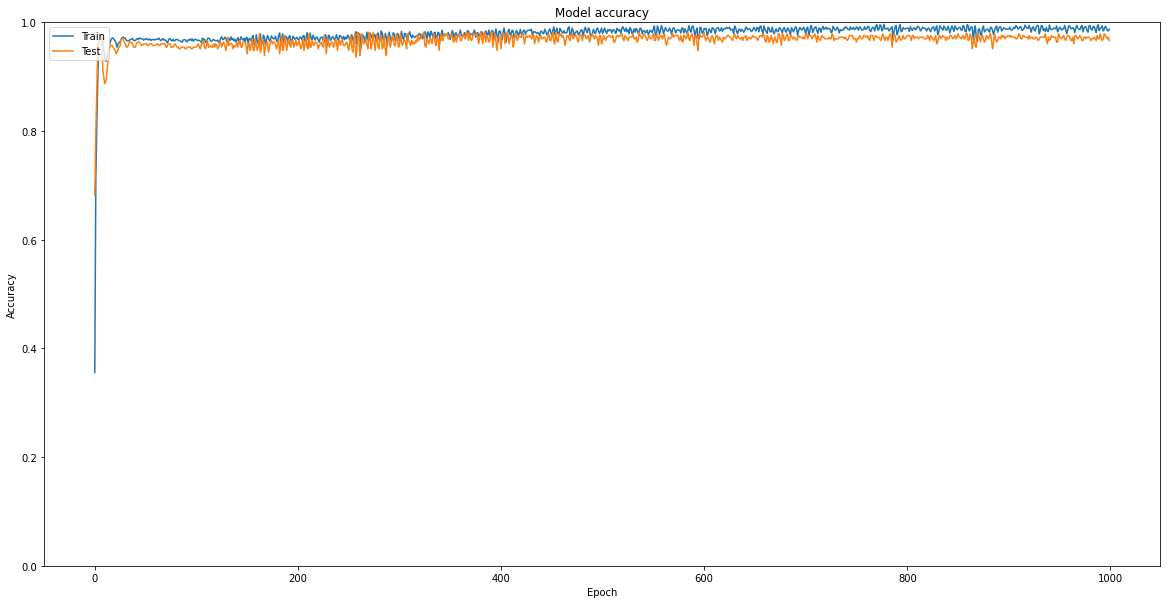

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim([0, 1.])
plt.show()



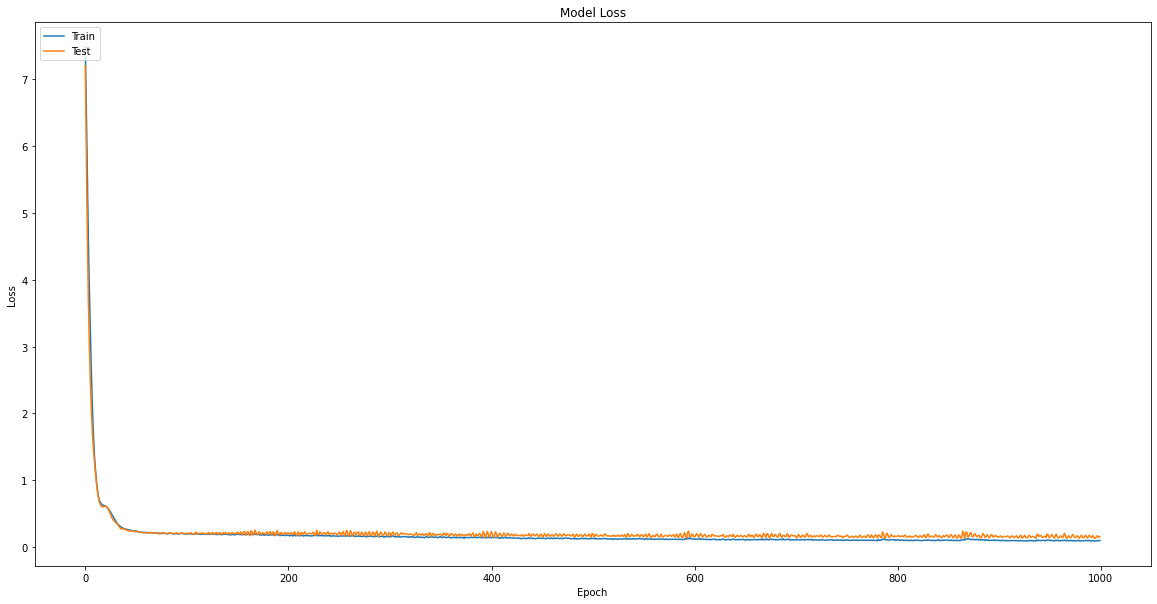

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#importance des paramétres de prédiction

In [ ]:
#https://analyticsindiamag.com/a-guide-to-explaining-feature-importance-in-neural-networks-using-shap/
%pip install shap
import shap
plt.rcParams['figure.figsize'] = [20, 10]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# use Kernel SHAP to explain test set predictions
e = shap.KernelExplainer(model, X)#, link="logit")
Data_shap=shap.sample(X, 100)
shap_values = e.shap_values(Data_shap, nsamples=100)


Using 1632 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [ ]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
features=list(Data_shap)
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)

In [ ]:
shap.summary_plot(shap_values[0], Data_shap, feature_names=features, plot_size=(20,10))

In [ ]:
shap.initjs()
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(e.expected_value[0], shap_values[0], Data_shap , link="logit")

#recherche seuil optimum

Best Threshold=0.387945


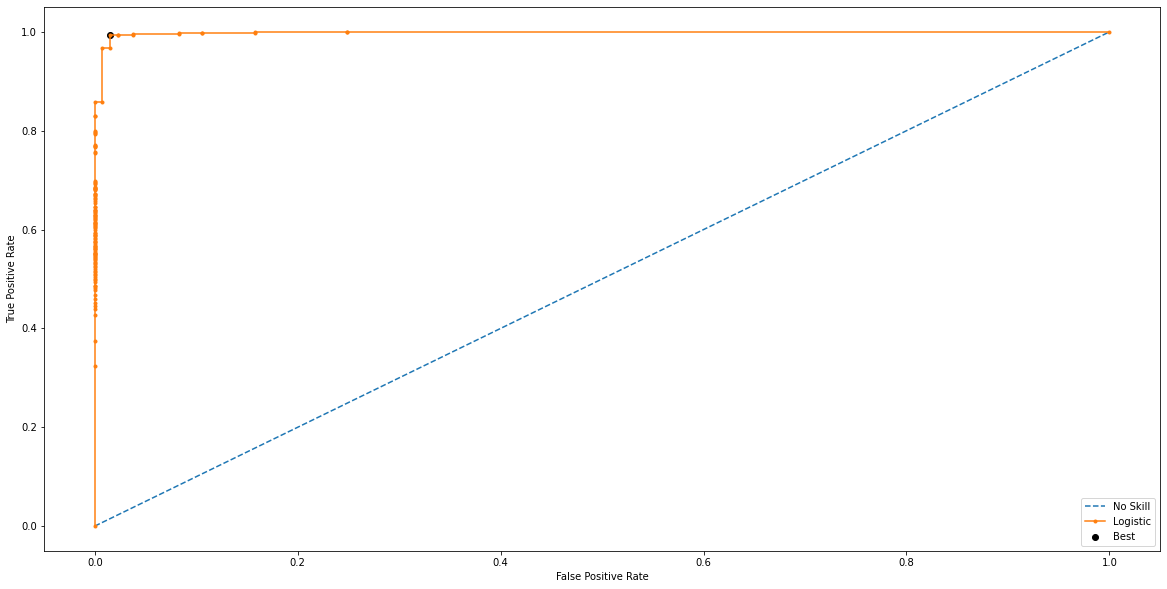

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
y_predicted = model.predict(X)
# keep probabilities for the positive outcome only
y_predicted=y_predicted[:,[1]]
y_true=y[:,1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_true, y_predicted)
# get the best threshold  Youden’s J statistic.
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
# plot the roc curve for the model
fig, axes = plt.subplots(figsize=(20,10))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix],tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# show the plot
pyplot.show()
#rajouter calul AUC 

Best Threshold=0.192078, F-Score=0.997


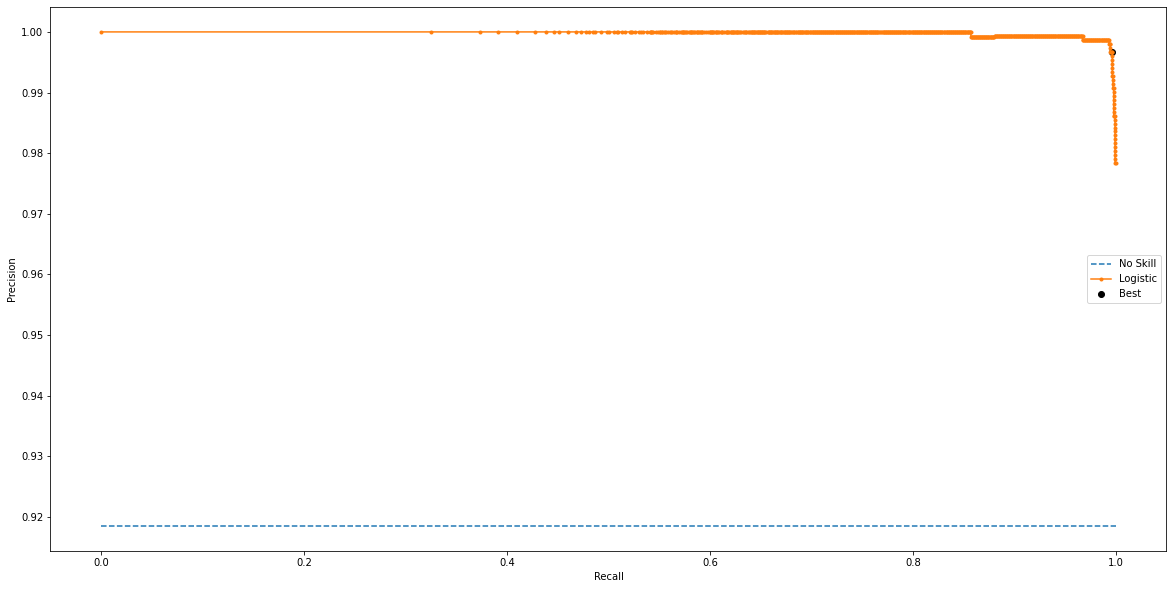

In [ ]:
#Optimal Threshold for Precision-Recall Curve: 

#Unlike the ROC Curve, a precision-recall curve focuses on the performance of a classifier on the positive 
#Precision is the ratio of the number of true positives divided by the sum of the true positives and false positives.
#Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives.

from sklearn.metrics import precision_recall_curve
# predict probabilities
y_predicted = model.predict(X)
# keep probabilities for the positive outcome only
y_predicted=y_predicted[:,[1]]
y_true=y[:,[1]]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_true, y_predicted)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
fig, axes = plt.subplots(figsize=(20,10))
no_skill = len(y_true[y_true==1]) / len(y_true)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


Best Threshold=0.824784, F-Score=0.962


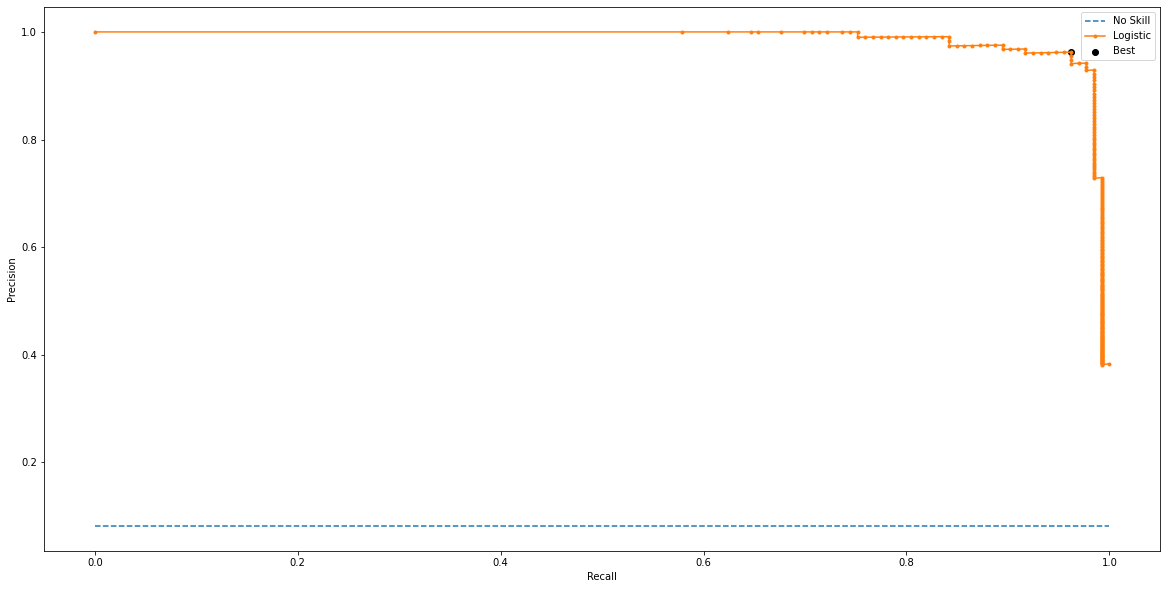

In [ ]:
#Optimal Threshold for Precision-Recall Curve:

#Unlike the ROC Curve, a precision-recall curve focuses on the performance of a classifier on the Negative
#Precision is the ratio of the number of true positives divided by the sum of the true positives and false positives.
#Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives.

from sklearn.metrics import precision_recall_curve
# predict probabilities
y_predicted = model.predict(X)
# keep probabilities for the negative outcome only
y_predicted=y_predicted[:,[0]]
y_true=1-y[:,[1]]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_true, y_predicted)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
fig, axes = plt.subplots(figsize=(20,10))
no_skill = len(y_true[y_true==1]) / len(y_true)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


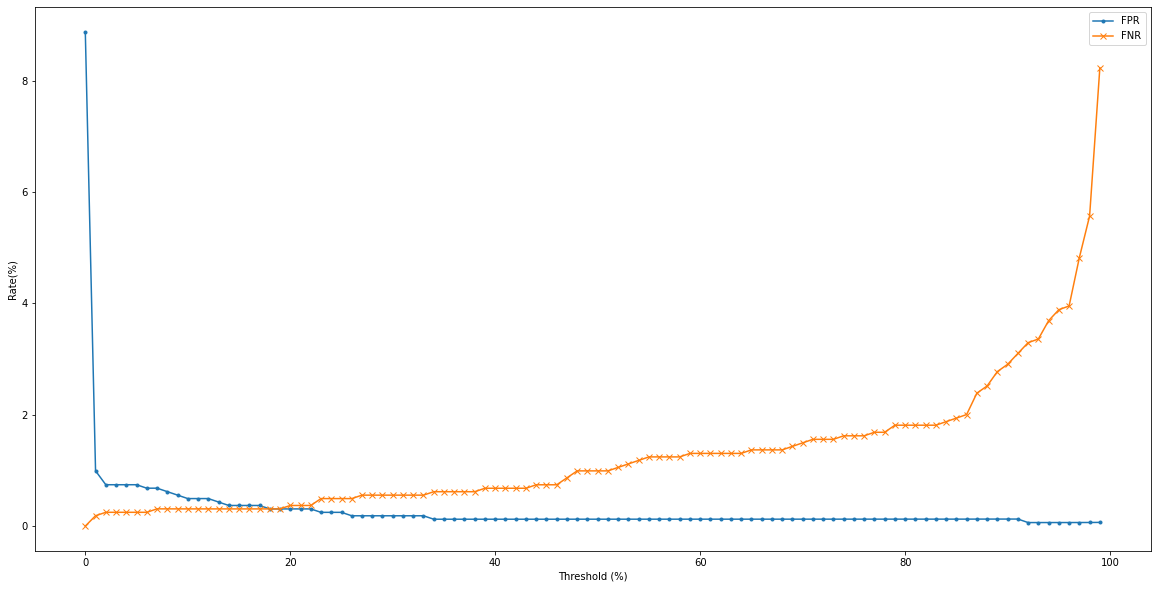

In [ ]:
from inspect import TPFLAGS_IS_ABSTRACT
#Nombre de faux positif en fonction du seuil:

# predict probabilities
y_predicted = model.predict(X)
# keep probabilities for the positive outcome only
y_predicted=y_predicted[:,1]
y_true=y[:,1]
# calculate Taux de faux positif en fonction du seuil
T=np.zeros(100)
FP=np.zeros(100)
FN=np.zeros(100)
thresholds=np.zeros(100)
for i in range(0,100):
  thresholds[i]=i
  y_predicted_labels=np.where(y_predicted > thresholds[i]/100, 1,0)
  DIFF=y_predicted_labels-y_true
  unique, counts = np.unique(DIFF, return_counts=True)
  Dict_result=dict(zip(unique, counts))
  if 0.0 in Dict_result :
    T[i]=Dict_result[0.0]
  else:
    T[i]=0
  if 1.0 in Dict_result :  
    FP[i]=Dict_result[1.0]
  else:
    FP[i]=0
  if -1.0 in Dict_result :   
    FN[i]=Dict_result[-1.0]
  else:
    FN[i]=0
  

fpr=FP/T*100
fnr=FN/T*100

# plot the roc curve for the model
fig, axes = plt.subplots(figsize=(20,10))
pyplot.plot(thresholds, fpr, marker='.', label='FPR')
pyplot.plot(thresholds, fnr, marker='x', label='FNR')
# axis labels
pyplot.xlabel('Threshold (%)')
pyplot.ylabel('Rate(%)')
pyplot.legend()
# show the plot
pyplot.show()

#validation du modéle:

In [ ]:
Best_threshold=best_thresh
Best_threshold

0.3879447

In [ ]:
model.evaluate(X_train,y_train)
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 4ms/step - loss: 0.1542 - binary_accuracy: 0.9786


[0.15415319800376892, 0.9785932898521423]

11/11 [==============================] - 0s 5ms/step - loss: 0.1542 - binary_accuracy: 0.9786


Text(87.0, 0.5, 'Truth')

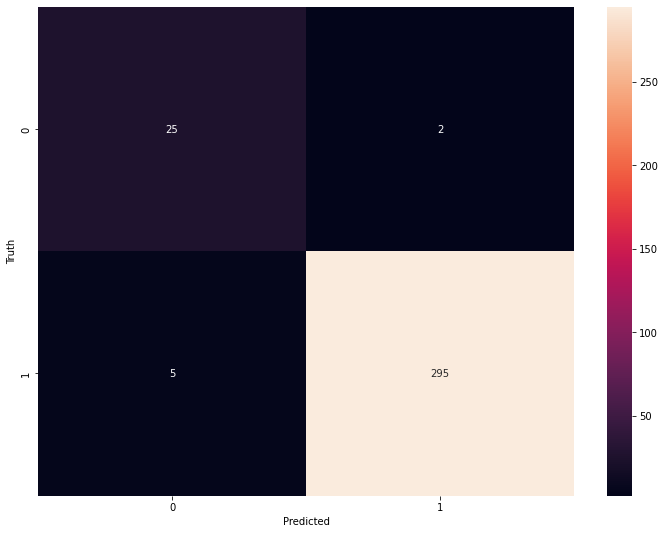

In [ ]:
#performance du model sur le test

model.evaluate(X_test,y_test)

y_predicted_labels = model.predict(X_test)
y_predicted_labels=y_predicted_labels[:,1]
y_predicted_labels=np.where(y_predicted_labels > Best_threshold, 1,0)

y_test_labels=y_test[:,1]

cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_predicted_labels,num_classes=2)

plt.figure(figsize = (12,9))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


51/51 [==============================] - 0s 3ms/step - loss: 0.1001 - binary_accuracy: 0.9890
seuil utilisé:
0.3879447


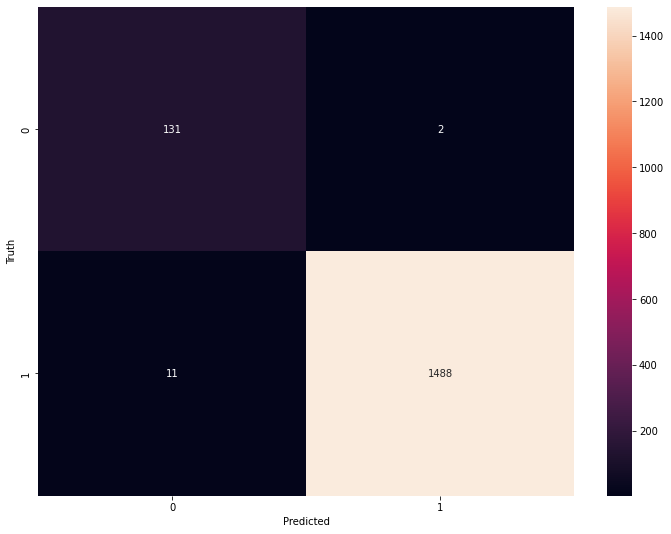

In [ ]:
#performance du model du toute la database

model.evaluate(X,y)

y_predicted_labels = model.predict(X)
y_predicted_labels=y_predicted_labels[:,1]
y_predicted_labels=np.where(y_predicted_labels > Best_threshold, 1,0)

y_test_labels=y[:,1]

cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_predicted_labels,num_classes=2)

plt.figure(figsize = (12,9))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print("seuil utilisé:")
print(Best_threshold)

[1 1 1 ... 1 1 1]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.998


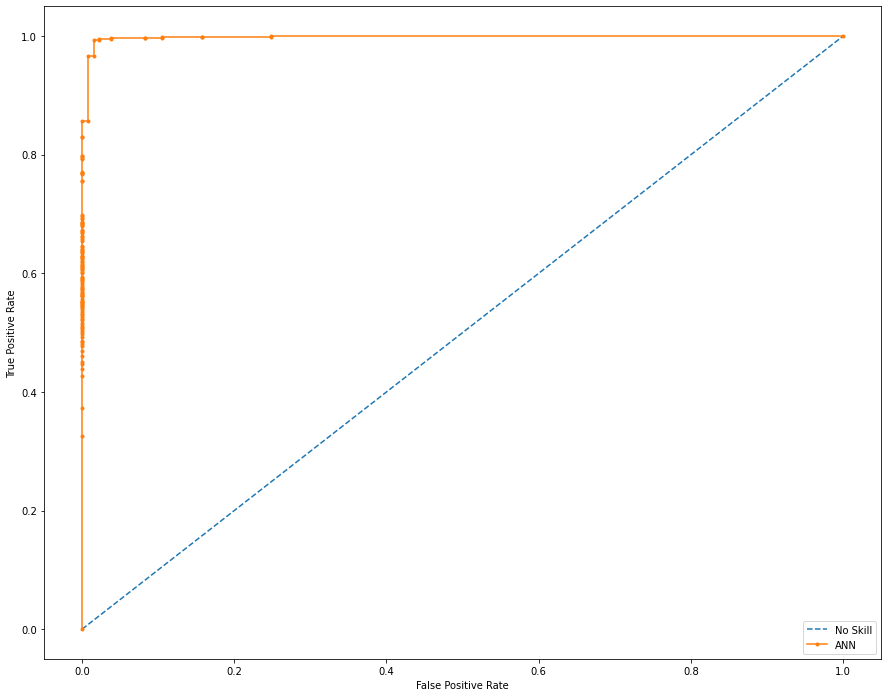

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#X=tf.convert_to_tensor(X)
#y=tf.convert_to_tensor(y)


y_predicted_labels = model.predict(X)
lr_probs=y_predicted_labels[:,1]
testy=y[:,1]


print(testy)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.figure(figsize = (15,12))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ANN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot

pyplot.show()

#sauvegarde du modéle:

In [ ]:
from joblib import dump,load
dump(model,"DL_model_ToutesLoc.joblib")

dump(ScalerAll, "fonctionDeNormalisation.joblib")

INFO:tensorflow:Assets written to: ram://32c81875-2d08-4aca-a3ff-2e179a131c18/assets


['fonctionDeNormalisation.joblib']

In [ ]:
model_test=load("DL_model")
model_test.evaluate(X_test,y_test)